Banking – Predicting Loan Default (AdaBoost)
A bank wants to predict whether a customer will default on a loan (Yes/No) based on:
Monthly_Income (in local currency)
Loan_Amount (requested loan size)
Credit_Score (rating between 300–850)
Since individual decision trees can be weak learners (often shallow stumps), the bank applies AdaBoost.
AdaBoost sequentially trains trees, giving higher weights to misclassified customers (e.g., those who defaulted but were predicted safe).
Each new tree focuses more on these “hard cases.”
Final prediction is a weighted vote across all trees.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_excel("loan_dataset.xlsx")
df.shape

(50, 5)

In [6]:
df.head(2)

,Customer_ID,Monthly_Income,Loan_Amount,Credit_Score,Default
0,CUST3001,81422,6899,635,No
1,CUST3002,40795,6267,562,No


In [7]:
df=df.drop(columns=["Customer_ID"])

In [8]:
colms=["Default"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in colms:
    df[col] = le.fit_transform(df[col])


In [9]:
df.head(2)

,Monthly_Income,Loan_Amount,Credit_Score,Default
0,81422,6899,635,0
1,40795,6267,562,0


In [10]:
X=df.drop(columns=["Default"])
y=df["Default"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [12]:
stump=DecisionTreeClassifier(max_depth=6,random_state=42)

In [13]:
ada=AdaBoostClassifier(estimator=stump,n_estimators=50,random_state=42)
ada.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [14]:
y_pred=ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Accuracy: 0.6


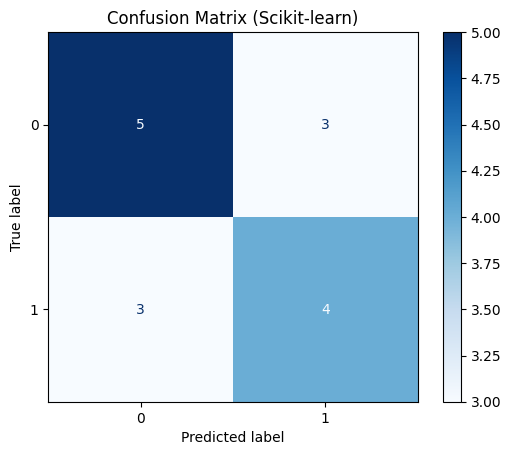

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=ada.classes_)

class_names = df["Default"].unique()
# 3. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # You can change the color map (e.g., 'Greens', 'plasma')
plt.title("Confusion Matrix (Scikit-learn)")
plt.show()